# **Theoretical Questions**

1.	What is K-Nearest Neighbors (KNN) and how does it work?

 -> K-Nearest Neighbors (KNN) is a supervised learning algorithm used for both classification and regression tasks. It works by finding the K most similar data points (nearest neighbors) to a new input and using their labels or values to make predictions. For classification, the most common class among these neighbors is chosen, while for regression, the average value is used.

2.	What is the difference between KNN Classification and KNN Regression?

  •	KNN Classification: Predicts a categorical label by finding the most common class among the K nearest neighbors.
  
  •	KNN Regression: Predicts a continuous value by averaging the values of the K nearest neighbors.

3.	What is the role of the distance metric in KNN?

  -> The distance metric (e.g., Euclidean, Manhattan) determines how similarity between data points is measured. Different metrics can lead to different nearest neighbors being selected, affecting model performance.

4.	What is the Curse of Dimensionality in KNN?

-> The Curse of Dimensionality refers to the problem that as the number of features increases, the distance between points becomes less meaningful, making it harder to find truly similar neighbors. This can lead to decreased model performance.

5.	How can we choose the best value of K in KNN?

-> Choosing the best K involves balancing between overfitting (small K) and underfitting (large K). Cross-validation is often used to find the optimal K by evaluating model performance across different values.

6.	What are KD Tree and Ball Tree in KNN?

  •	KD Tree: A data structure that efficiently organizes points in a k-dimensional space, allowing for fast nearest neighbor searches.
  
  •	Ball Tree: Similar to KD Tree but more efficient for high-dimensional data, using a ball-like structure to partition space.

7.	When should you use KD Tree vs. Ball Tree?

 -> Use KD Tree for lower-dimensional data and Ball Tree for higher-dimensional data due to its efficiency in such cases.

8.	What are the disadvantages of KNN?

-> Disadvantages include sensitivity to noise, computationally expensive for large datasets, and difficulty handling high-dimensional data.

9.	How does feature scaling affect KNN?

-> Feature scaling is crucial in KNN as it ensures that all features contribute equally to the distance calculation, preventing features with large ranges from dominating the metric.

10.	What is PCA (Principal Component Analysis)?

-> PCA is a dimensionality reduction technique that transforms data into a new coordinate system where the axes (principal components) are ordered by their variance. This helps in reducing data complexity while retaining most of the information.

11.	How does PCA work?

-> PCA works by computing the eigenvectors and eigenvalues of the covariance matrix of the data. The eigenvectors represent the new axes (principal components), and the eigenvalues represent the amount of variance explained by each component.

12.	What is the geometric intuition behind PCA?

-> Geometrically, PCA rotates the data to align with the directions of maximum variance, allowing for dimensionality reduction by retaining only the most informative components.

13.	What is the difference between Feature Selection and Feature Extraction?

  •	Feature Selection: Selects a subset of the original features.

  •	Feature Extraction: Transforms the original features into new ones, often reducing dimensionality.

14.	What are Eigenvalues and Eigenvectors in PCA?

  •	Eigenvalues: Represent the amount of variance explained by each principal component.

  •	Eigenvectors: Represent the directions of the new axes (principal components).


15.	How do you decide the number of components to keep in PCA?

 -> The number of components is often chosen based on the cumulative explained variance ratio, typically aiming to retain about 90% of the variance.


16.	Can PCA be used for classification?

  -> PCA itself is not a classification method but can be used as a preprocessing step to improve classification performance by reducing dimensionality and noise.

17.	What are the limitations of PCA?

 -> PCA assumes linear relationships and can be sensitive to outliers. It also does not handle categorical variables directly.

18.	How do KNN and PCA complement each other?

  -> PCA can improve KNN performance by reducing dimensionality and noise, making it easier for KNN to find meaningful neighbors.

19.	How does KNN handle missing values in a dataset?

  -> KNN does not inherently handle missing values. Techniques like imputation (e.g., mean, median) are typically used before applying KNN.

20.	What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

  •	PCA: Focuses on maximizing variance, not necessarily related to class separation.

  •	LDA: Focuses on maximizing class separation, making it more suitable for classification tasks


# **PRACTICAL QUESTIONS**

In [2]:
# 21. Train a KNN Classifier on the Iris dataset and print model accuracy

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate accuracy
y_pred = knn.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.9555555555555556


In [3]:
# 22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate MSE
y_pred = knn.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Squared Error: 8262.66967316915


In [4]:
# 23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train KNN Classifier with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=5)
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)

# Train KNN Classifier with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)

# Compare accuracy
print("Euclidean Accuracy:", accuracy_score(y_test, y_pred_euclidean))
print("Manhattan Accuracy:", accuracy_score(y_test, y_pred_manhattan))


Euclidean Accuracy: 1.0
Manhattan Accuracy: 1.0


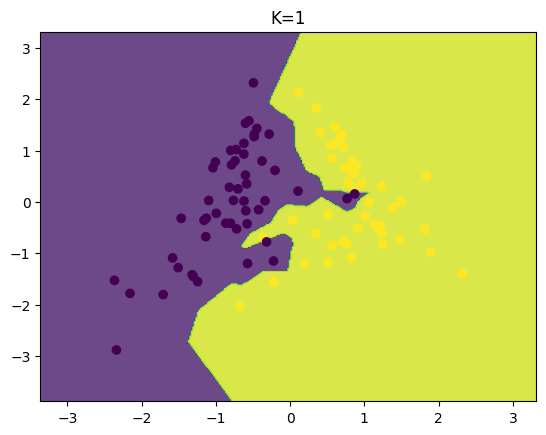

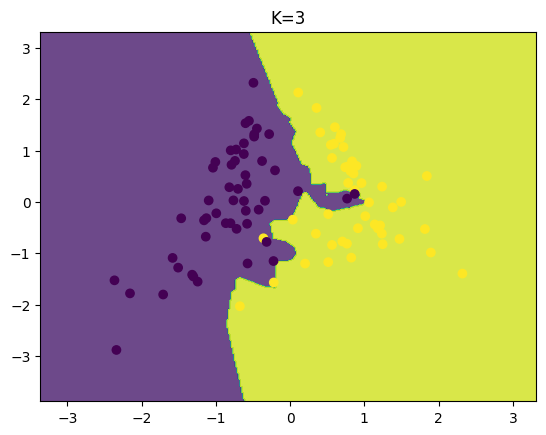

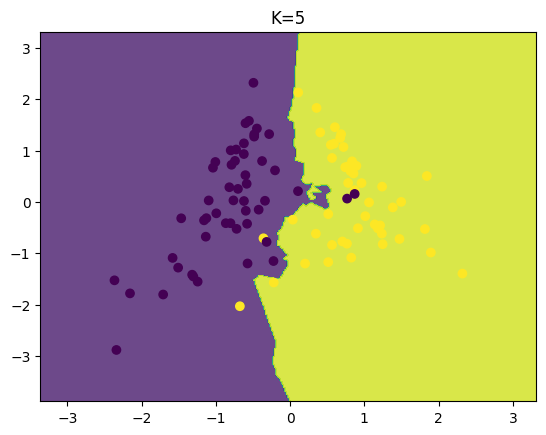

In [6]:
# 24. Train a KNN Classifier with different values of K and visualize decision boundaries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Generate synthetic classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KNN Classifier with different K values
for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)

    # Plot decision boundary
    h = .02
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
    plt.title(f"K={k}")
    plt.show()


In [7]:
# 25. Apply Feature Scaling before training a KNN model and compare results with unscaled data.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train KNN Classifier without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN Classifier with scaling
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Compare accuracy
print("Unscaled Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print("Scaled Accuracy:", accuracy_score(y_test, y_pred_scaled))


Unscaled Accuracy: 0.9777777777777777
Scaled Accuracy: 0.9777777777777777


In [8]:
# 26. Train a PCA model on synthetic data and print the explained variance ratio for each component.

from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, _ = make_blobs(n_samples=1000, centers=3, n_features=10)

# Train PCA model
pca = PCA(n_components=None)
pca.fit(X)

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.75846968 0.21040033 0.00462878 0.00428649 0.00407018 0.00395027
 0.00379543 0.00360819 0.0034473  0.00334335]


In [9]:
# 27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train KNN Classifier without PCA
knn_without_pca = KNeighborsClassifier(n_neighbors=5)
knn_without_pca.fit(X_train, y_train)
y_pred_without_pca = knn_without_pca.predict(X_test)

# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train KNN Classifier with PCA
knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca, y_train)
y_pred_with_pca = knn_with_pca.predict(X_test_pca)

# Compare accuracy
print("Accuracy without PCA:", accuracy_score(y_test, y_pred_without_pca))
print("Accuracy with PCA:", accuracy_score(y_test, y_pred_with_pca))


Accuracy without PCA: 0.9777777777777777
Accuracy with PCA: 0.9777777777777777


In [10]:
# 28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Define hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Best Score: 0.9333333333333333


In [11]:
# 29. Train a KNN Classifier and check the number of misclassified samples.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Count misclassified samples
misclassified = sum(y_test != y_pred)
print("Number of Misclassified Samples:", misclassified)


Number of Misclassified Samples: 2


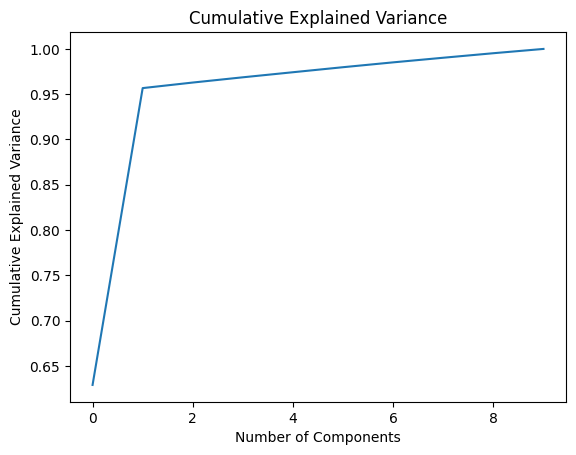

In [12]:
  # 30. Train a PCA model and visualize the cumulative explained variance.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, _ = make_blobs(n_samples=1000, centers=3, n_features=10)

# Train PCA model
pca = PCA(n_components=None)
pca.fit(X)

# Calculate cumulative explained variance
cum_var = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.plot(cum_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()


In [13]:
# 31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train KNN Classifier with uniform weights
knn_uniform = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_uniform.fit(X_train, y_train)
y_pred_uniform = knn_uniform.predict(X_test)

# Train KNN Classifier with distance weights
knn_distance = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_distance.fit(X_train, y_train)
y_pred_distance = knn_distance.predict(X_test)

# Compare accuracy
print("Uniform Weights Accuracy:", accuracy_score(y_test, y_pred_uniform))
print("Distance Weights Accuracy:", accuracy_score(y_test, y_pred_distance))


Uniform Weights Accuracy: 1.0
Distance Weights Accuracy: 1.0


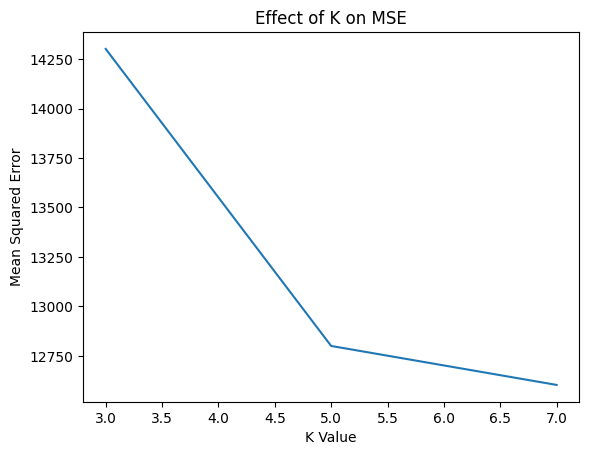

In [14]:
# 32. Train a KNN Regressor and analyze the effect of different K values on performance.

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train KNN Regressor with different K values
k_values = [3, 5, 7]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot MSE vs. K
import matplotlib.pyplot as plt
plt.plot(k_values, mse_values)
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.title('Effect of K on MSE')
plt.show()


In [16]:
# 33. Implement KNN Imputation for handling missing values in a dataset.
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Sample dataset with missing values
data = {
    'Feature1': [1.0, 2.0, np.nan, 4.0],
    'Feature2': [np.nan, 2.0, 3.0, 4.0],
    'Feature3': [1.0, 2.0, 3.0, np.nan]
}

df = pd.DataFrame(data)
print("Data before KNN Imputation:\n", df)

# Initialize KNNImputer (using 2 neighbors in this example)
imputer = KNNImputer(n_neighbors=2)

# Perform KNN imputation
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\nData after KNN Imputation:\n", df_imputed)


Data before KNN Imputation:
    Feature1  Feature2  Feature3
0       1.0       NaN       1.0
1       2.0       2.0       2.0
2       NaN       3.0       3.0
3       4.0       4.0       NaN

Data after KNN Imputation:
    Feature1  Feature2  Feature3
0       1.0       2.5       1.0
1       2.0       2.0       2.0
2       3.0       3.0       3.0
3       4.0       4.0       2.5


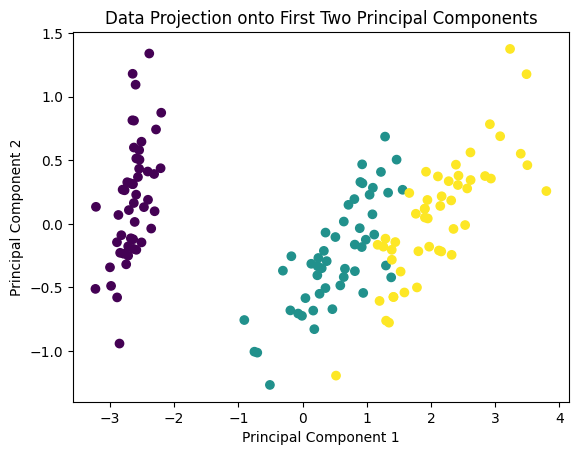

In [17]:
# 34. Train a PCA model and visualize the data projection onto the first two principal components.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train PCA model
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot data projection
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data Projection onto First Two Principal Components')
plt.show()


In [18]:
# 35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train KNN Classifier with KD Tree
knn_kdtree = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
knn_kdtree.fit(X_train, y_train)
y_pred_kdtree = knn_kdtree.predict(X_test)

# Train KNN Classifier with Ball Tree
knn_balltree = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
knn_balltree.fit(X_train, y_train)
y_pred_balltree = knn_balltree.predict(X_test)

# Compare accuracy
print("KD Tree Accuracy:", accuracy_score(y_test, y_pred_kdtree))
print("Ball Tree Accuracy:", accuracy_score(y_test, y_pred_balltree))


KD Tree Accuracy: 0.8888888888888888
Ball Tree Accuracy: 0.8888888888888888


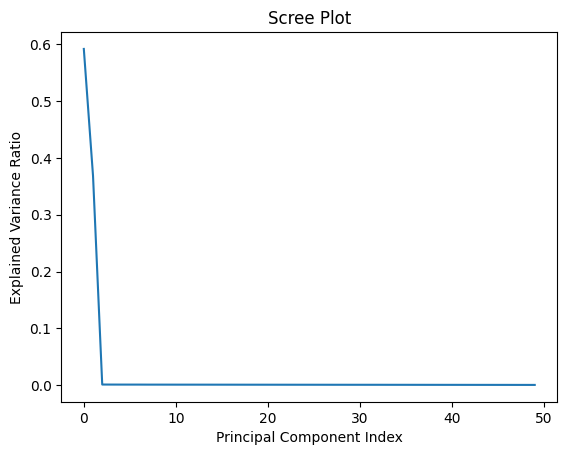

In [19]:
# 36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Generate high-dimensional dataset
X, _ = make_blobs(n_samples=1000, centers=3, n_features=50)

# Train PCA model
pca = PCA(n_components=None)
pca.fit(X)

# Plot Scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


In [20]:
# 37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate performance
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.9111111111111111
Recall: 0.9111111111111111
F1-Score: 0.9111111111111111


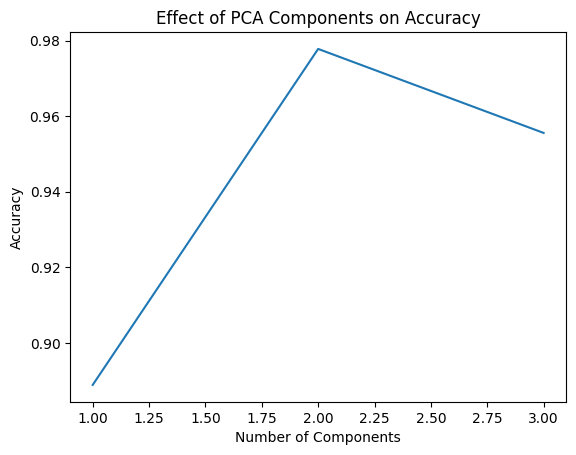

In [21]:
# 38. Train a PCA model and analyze the effect of different numbers of components on accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train PCA model with different numbers of components
components = [1, 2, 3]
accuracies = []

for n_components in components:
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Train KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_test_pca)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs. number of components
import matplotlib.pyplot as plt
plt.plot(components, accuracies)
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.title('Effect of PCA Components on Accuracy')
plt.show()


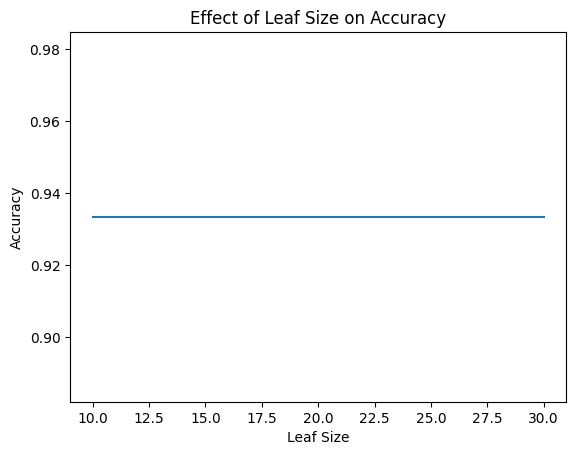

In [22]:
# 39. Train a KNN Classifier with different leaf_size values and compare accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train KNN Classifier with different leaf_size values
leaf_sizes = [10, 20, 30]
accuracies = []

for leaf_size in leaf_sizes:
    knn = KNeighborsClassifier(n_neighbors=5, leaf_size=leaf_size)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot accuracy vs. leaf_size
import matplotlib.pyplot as plt
plt.plot(leaf_sizes, accuracies)
plt.xlabel('Leaf Size')
plt.ylabel('Accuracy')
plt.title('Effect of Leaf Size on Accuracy')
plt.show()


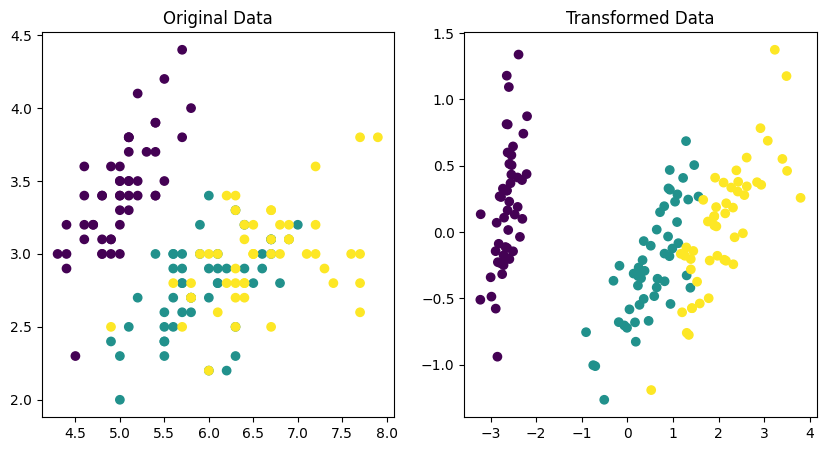

In [23]:
# 40. Train a PCA model and visualize how data points are transformed before and after PCA.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train PCA model
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original Data')

# Plot transformed data
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('Transformed Data')
plt.show()


In [24]:
# 41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        22
           1       0.88      0.68      0.77        22
           2       0.40      0.60      0.48        10

    accuracy                           0.74        54
   macro avg       0.72      0.72      0.70        54
weighted avg       0.79      0.74      0.75        54



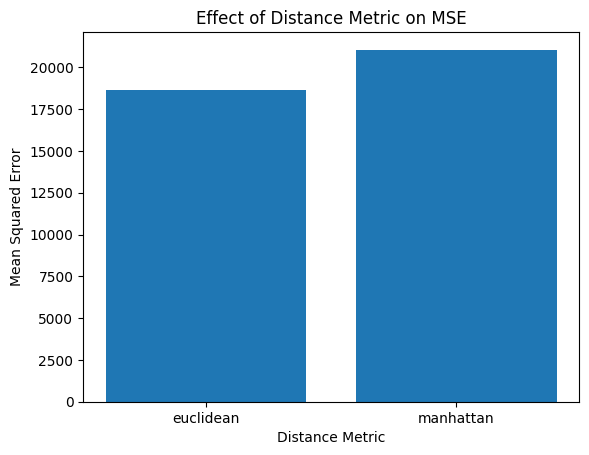

In [25]:
# 42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train KNN Regressor with different distance metrics
metrics = ['euclidean', 'manhattan']
mse_values = []

for metric in metrics:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Evaluate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot MSE vs. distance metric
import matplotlib.pyplot as plt
plt.bar(metrics, mse_values)
plt.xlabel('Distance Metric')
plt.ylabel('Mean Squared Error')
plt.title('Effect of Distance Metric on MSE')
plt.show()


In [26]:
# 43. Train a KNN Classifier and evaluate using ROC-AUC score.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# Load Iris dataset (convert to binary classification)
iris = load_iris()
X = iris.data
y = iris.target
y_binary = np.where(y == 0, 0, 1)  # Convert to binary

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_proba = knn.predict_proba(X_test)[:, 1]

# Evaluate ROC-AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC Score:", auc)


ROC-AUC Score: 1.0


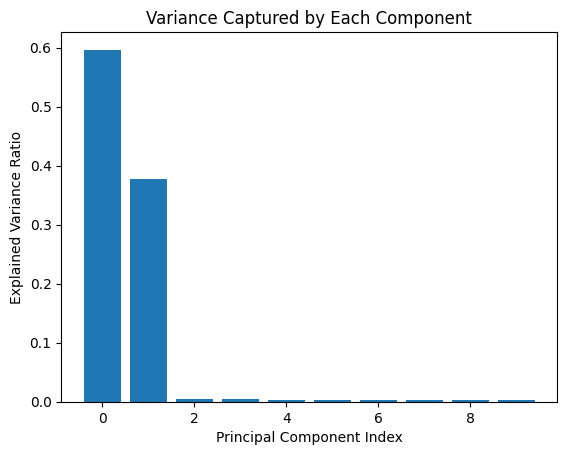

In [27]:
# 44. Train a PCA model and visualize the variance captured by each principal component.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, _ = make_blobs(n_samples=1000, centers=3, n_features=10)

# Train PCA model
pca = PCA(n_components=None)
pca.fit(X)

# Plot variance captured by each component
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Captured by Each Component')
plt.show()


In [28]:
# 45. Train a KNN Classifier and perform feature selection before training.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Perform feature selection
selector = SelectKBest(f_classif, k=2)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)

# Evaluate accuracy
print("Accuracy after Feature Selection:", accuracy_score(y_test, y_pred))


Accuracy after Feature Selection: 0.9777777777777777


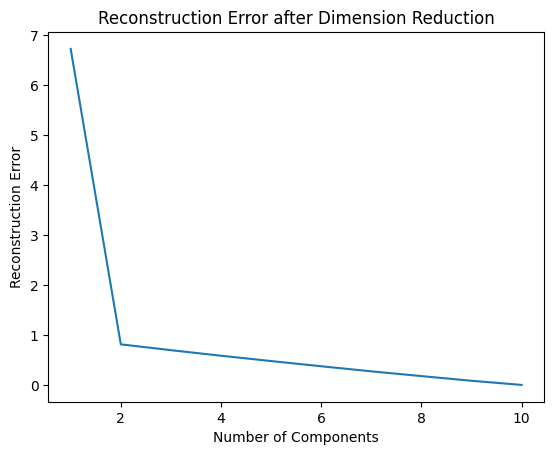

In [29]:
# 46. Train a PCA model and visualize the data reconstruction error after reducing dimensions.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, _ = make_blobs(n_samples=1000, centers=3, n_features=10)

# Train PCA model with different numbers of components
components = range(1, 11)
errors = []

for n_components in components:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)

    # Calculate reconstruction error
    error = np.mean((X - X_reconstructed) ** 2)
    errors.append(error)

# Plot reconstruction error vs. number of components
plt.plot(components, errors)
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error after Dimension Reduction')
plt.show()


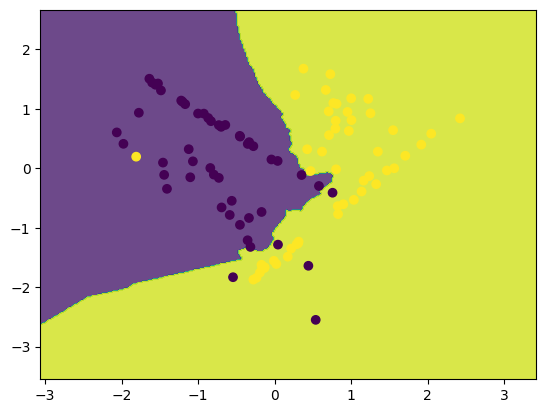

In [30]:
# 47. Train a KNN Classifier and visualize the decision boundary.

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Generate synthetic classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)

# Plot decision boundary
h = .02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
plt.show()


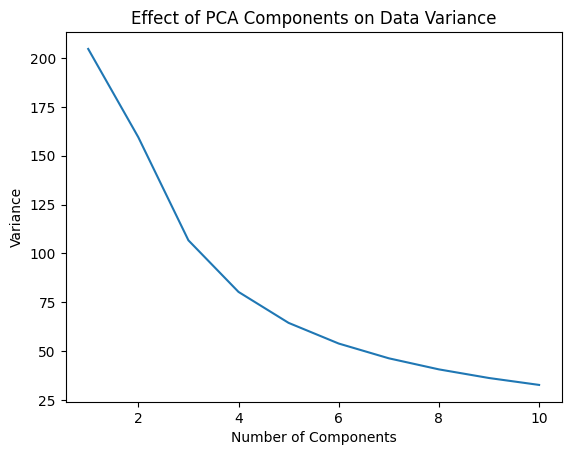

In [31]:
# 48. Train a PCA model and analyze the effect of different numbers of components on data variance.
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

# Generate synthetic dataset
X, _ = make_blobs(n_samples=1000, centers=3, n_features=10)

# Train PCA model with different numbers of components
components = range(1, 11)
variances = []

for n_components in components:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    # Calculate variance of transformed data
    variance = np.var(X_pca)
    variances.append(variance)

# Plot variance vs. number of components
plt.plot(components, variances)
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Effect of PCA Components on Data Variance')
plt.show()
